<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy_modelowanie_GradientBoostingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modelowanie

In [ ]:
import sklearn
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold #metoda walidacji krzyżowej, która dzieli zbiór danych na k podzbiorów o równej liczbie obserwacji

from sklearn.model_selection import cross_val_score #automatycznie wykonuje walidację krzyżową dla modelu i zestawu danych
from sklearn.model_selection import GridSearchCV #import biblioteki dla doboru optymalnych parametrów

from sklearn.preprocessing import PolynomialFeatures #import biblioteki regresji wielomianowej
from sklearn.linear_model import LinearRegression #import biblioteki regresji liniowej

from sklearn.tree import DecisionTreeRegressor #import biblioteki dla drzew decyzyjnych
from sklearn import tree #import modelu drzewa

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_flights.csv')
data=data.drop('Unnamed: 0', axis = 1)

In [ ]:
sample_size = 50000

In [ ]:
sampled_data = data.sample(n= sample_size, random_state = 42)

In [ ]:
sampled_data

,date,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,2015-03-26,851,3.0,15.0,869,217.0,1330,1068,-23.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
3901978,2015-07-03,405,-6.0,11.0,410,90.0,495,435,-4.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
1709905,2015-09-25,360,-11.0,12.0,361,73.0,273,433,-23.0,JetBlue Airways,...,0,0,0,1,0,0,0,0,0,0
4853679,2015-07-01,1278,13.0,15.0,1306,105.0,528,1383,9.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
2891404,2015-11-23,1153,-6.0,23.0,1170,161.0,1075,1374,4.0,Skywest Airlines Inc.,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494701,2015-09-16,1410,-3.0,10.0,1417,265.0,2052,415,-26.0,Spirit Air Lines,...,0,0,0,0,0,0,1,0,0,0
4529521,2015-05-01,981,11.0,13.0,1005,98.0,419,1079,10.0,American Eagle Airlines Inc.,...,0,0,0,0,0,0,0,0,0,0
2886806,2015-07-21,936,-4.0,17.0,949,89.0,395,1025,-13.0,Skywest Airlines Inc.,...,0,0,0,0,1,0,0,0,0,0
4583026,2015-03-17,970,-9.0,7.0,968,71.0,139,1041,-31.0,American Eagle Airlines Inc.,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = sampled_data.drop(['date' ,'arrival_delay', 'airline', 'scheduled_departure', 'wheels_off', 'scheduled_arrival'], axis=1)
y = sampled_data['arrival_delay']

In [ ]:
#X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 5142765 to 3696708
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   departure_delay                       50000 non-null  float64
 1   taxi_out                              50000 non-null  float64
 2   scheduled_time                        50000 non-null  float64
 3   distance                              50000 non-null  int64  
 4   scheduled_arrival                     50000 non-null  int64  
 5   scheduled_departure_norm              50000 non-null  float64
 6   cos_scheduled_departure_norm          50000 non-null  float64
 7   day_of_week_norm                      50000 non-null  float64
 8   cos_day_of_week_norm                  50000 non-null  float64
 9   scheduled_arrival_norm                50000 non-null  float64
 10  cos_scheduled_arrival_norm            50000 non-null  float64
 11  wheels_

In [ ]:
X.head()

,departure_delay,taxi_out,scheduled_time,distance,scheduled_arrival,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm,scheduled_arrival_norm,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,3.0,15.0,217.0,1330,1068,3.713188,-8.410390e-01,3.590392,-0.900969,4.660029,...,0,0,0,0,0,0,0,0,0,0
3901978,-6.0,11.0,90.0,495,435,1.767146,-1.950903e-01,4.487990,-0.222521,1.898046,...,0,0,0,0,0,1,0,0,0,0
1709905,-11.0,12.0,73.0,273,433,1.570796,6.123234e-17,4.487990,-0.222521,1.889319,...,0,0,0,1,0,0,0,0,0,0
4853679,13.0,15.0,105.0,528,1383,5.576327,7.604060e-01,2.692794,-0.900969,6.034476,...,0,0,0,0,0,0,0,0,0,0
2891404,-6.0,23.0,161.0,1075,1374,5.030912,3.131638e-01,0.897598,0.623490,5.995206,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 15),
                  'min_samples_split': range(2, 200, 20)
                  },
                  cv = 10, 
                  scoring = 'neg_mean_absolute_error',
                  error_score= 'raise' )
kf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_split': range(2, 200, 20)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 10, 'min_samples_split': 122}
-8.266964144892661


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

n_features_to_select = 5

rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

rfe.fit(X_train, y_train)

selected_feature_indices = rfe.support_

selected_feature_names = X_train.columns[selected_feature_indices]

print(selected_feature_names)

Index(['airline_Alaska Airlines Inc.', 'airline_Delta Air Lines Inc.',
       'airline_Frontier Airlines Inc.', 'airline_Hawaiian Airlines Inc.',
       'airline_Spirit Air Lines'],
      dtype='object')


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(verbose=2)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
       120        1245.9918           23.65s
       121        1243.7464           23.33s
       122        1241.5050           23.01s
       123        1239.2686           22.69s
       124        1237.0359           22.38s
       125        1234.8087           22.06s
       126        1232.5851           21.74s
       127        1230.3664           21.44s
       128        1228.1514           21.12s
       129        1225.9415           20.81s
       130        1223.7356           20.50s
       131        1221.5345           20.19s
       132        1219.3382           19.87s
       133        1217.1451           19.56s
       134        1214.9572           19.25s
       135        1212.7728           18.95s
       136        1210.5935           18.64s
       137        1208.4180           18.33s
       138        1206.2470           18.02s
       139        1204.0806           17.72s
       140        1201.9180        

In [ ]:
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best learning_rate:", grid_search.best_params_['learning_rate'])

Best max_depth: 5
Best n_estimators: 300
Best learning_rate: 0.1


In [ ]:
best_n_estimators = 300
best_max_depth = 5
best_learning_rate = 0.1

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_model = GradientBoostingRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, learning_rate = best_learning_rate)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2_score:", r2)

Mean Absolute Error: 6.966540051954519
Mean Squared Error: 96.50035840439298
r2_score: 0.9404609450736194


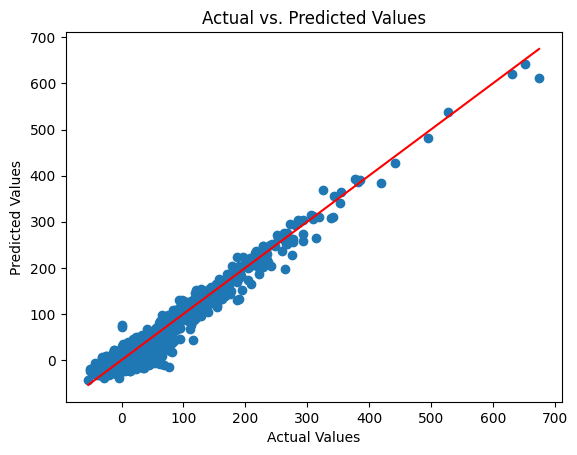

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.show()
plt.show()